In [2]:
# 1. Import Libraries & Load Dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load training data
df = pd.read_csv("train.csv")

# Quick overview
print(df.shape)
print(df.columns)
df.head()


(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


             Missing Count  Percentage
Cabin                  687   77.104377
Age                    177   19.865320
Embarked                 2    0.224467
PassengerId              0    0.000000
Name                     0    0.000000
Pclass                   0    0.000000
Survived                 0    0.000000
Sex                      0    0.000000
Parch                    0    0.000000
SibSp                    0    0.000000
Fare                     0    0.000000
Ticket                   0    0.000000


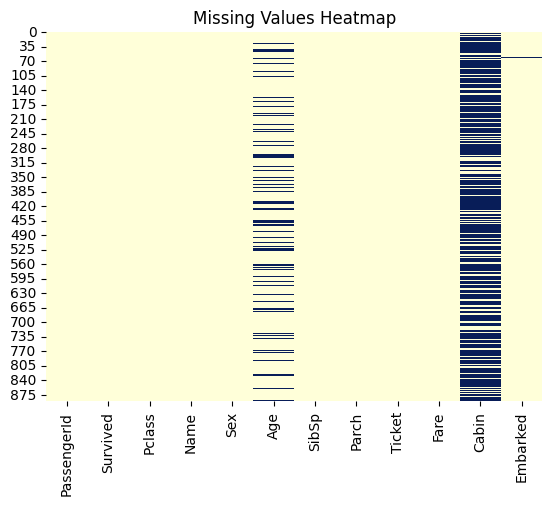

In [3]:
# 2. Missing Value Analysis
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / len(df)) * 100

missing_data = pd.DataFrame({'Missing Count': missing, 'Percentage': missing_percent})
print(missing_data)

# Heatmap of missing values
sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu")
plt.title("Missing Values Heatmap")
plt.show()

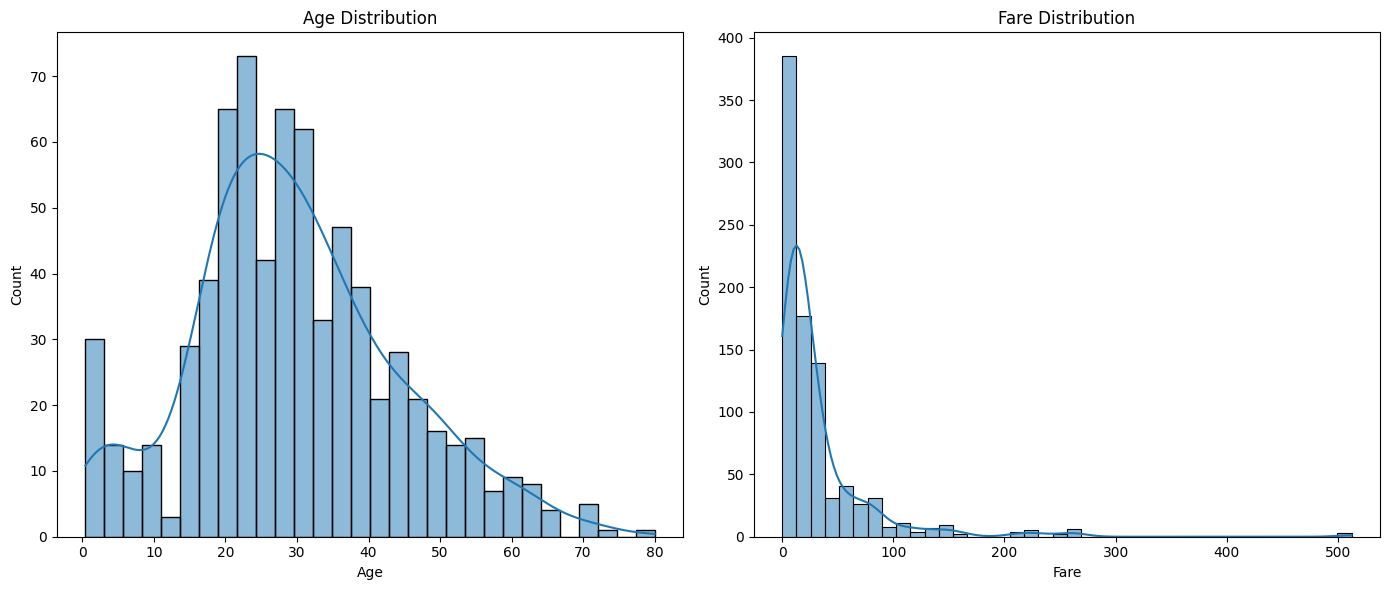

In [4]:
# 3. Numerical Distributions
# Age and Fare Distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(df['Age'].dropna(), kde=True, ax=axes[0], bins=30)
axes[0].set_title('Age Distribution')

sns.histplot(df['Fare'], kde=True, ax=axes[1], bins=40)
axes[1].set_title('Fare Distribution')

plt.tight_layout()
plt.show()

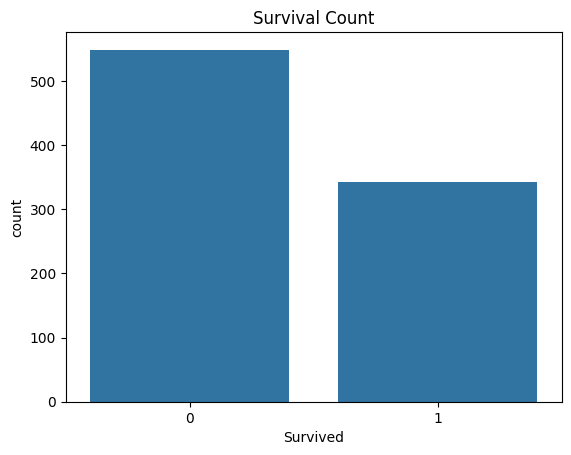

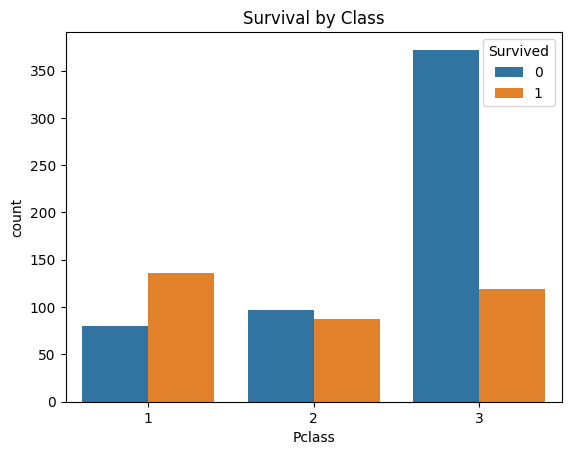

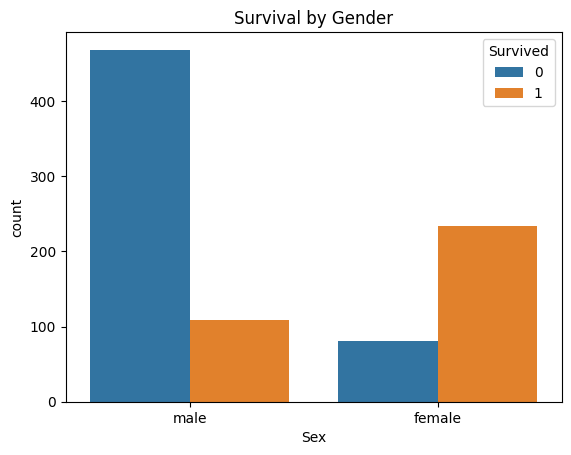

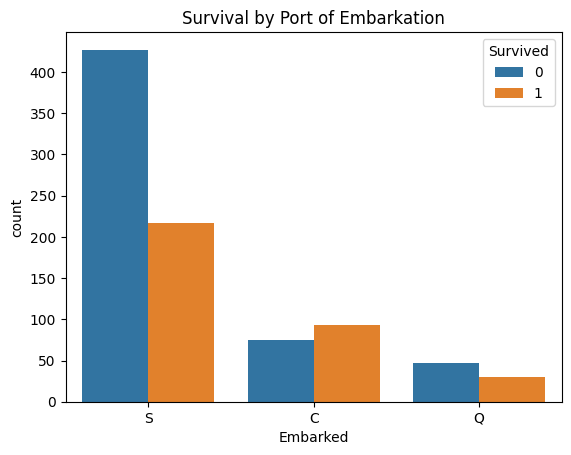

In [5]:
# 4. Categorical Feature Distribution
# Count of survival
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

# Survival by Passenger Class
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Class')
plt.show()

# Survival by Sex
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.show()

# Survival by Embarked
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival by Port of Embarkation')
plt.show()

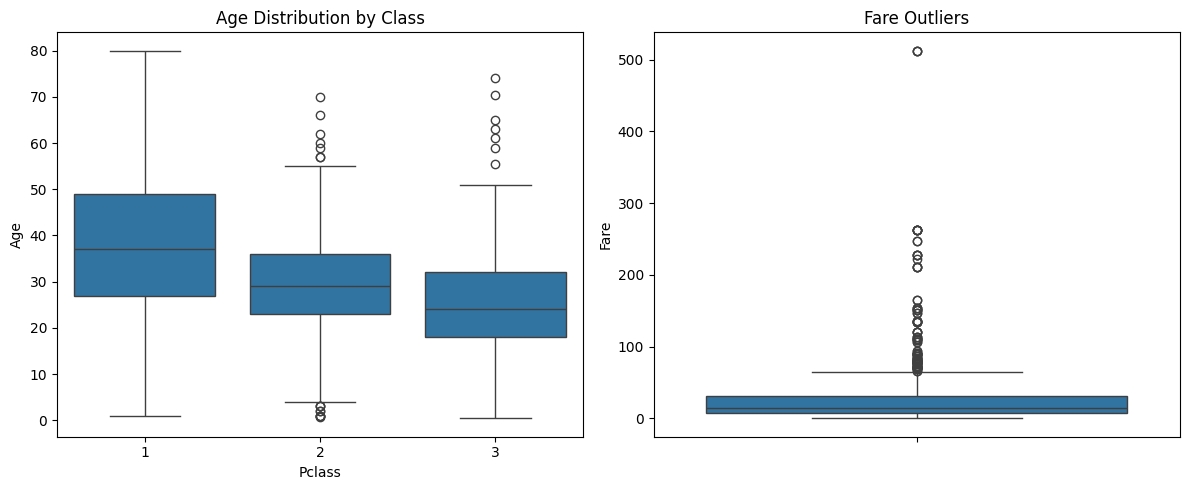

In [6]:
# 5. Outlier Detection
# Boxplot of Age and Fare
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title("Age Distribution by Class")

plt.subplot(1, 2, 2)
sns.boxplot(y='Fare', data=df)
plt.title("Fare Outliers")

plt.tight_layout()
plt.show()

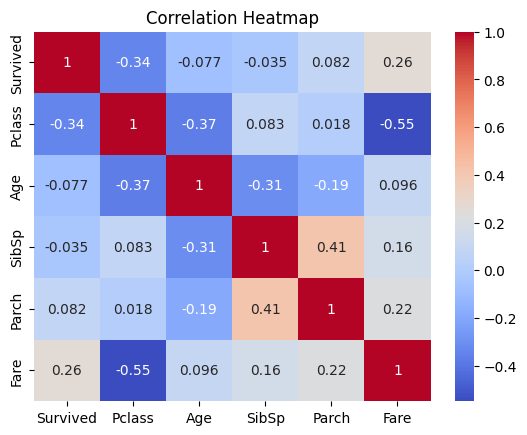

In [7]:
# 6. Correlation Matrix
# Correlation matrix
corr = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

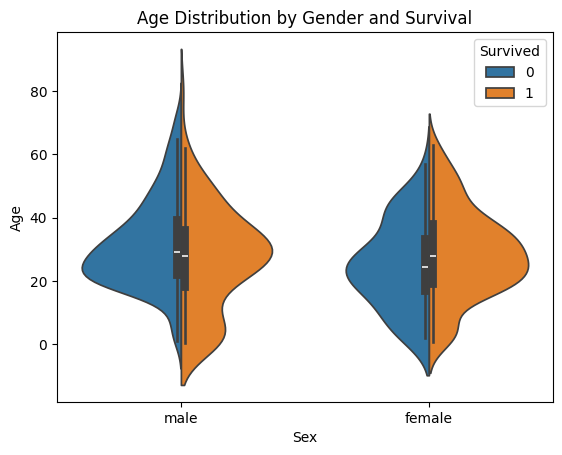

In [8]:
# 7. Violin Plot: Age, Sex, and Survival
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df, split=True)
plt.title("Age Distribution by Gender and Survival")
plt.show()


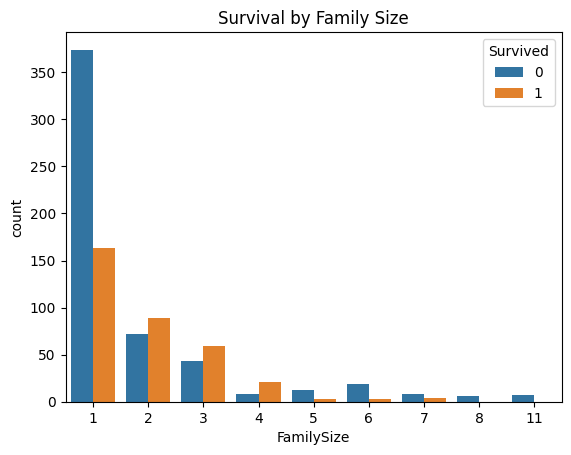

In [9]:
#  8. Extra (Optional): Create New Feature – Family Size
# Feature Engineering
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

sns.countplot(x='FamilySize', hue='Survived', data=df)
plt.title("Survival by Family Size")
plt.show()